# Theory of Symmetry Groups


In [1]:
from symmart.operators import MatrixOperator, complete_group
from symmart.wallpaper_groups import wallpaper_generators
import sympy as sp
import numpy as np
from symmart.unitcell import SvgwriteCellDiagram
from numpy import pi


## Operator Representation

Farris prefers complex algebra for representing the symmetry groups. Projective geometric algebra ($PGA(2)$) would also be a good system to represent symmetry transformations. However, for a first implementation we go with familiar orthogonal matrices in homogeneous coordinates. Sympy is used to ensure there are no floating point issues.

In [2]:
# fundamental operators
half = sp.sympify(1)/2  # avoid floats
𝜏1 = MatrixOperator([[1, 0, 1], [0, 1, 0], [0, 0, 1]],"𝜏1")
𝜏i = MatrixOperator([[1, 0, 0], [0, 1, 1], [0, 0, 1]],"𝜏i")
𝜌2 = MatrixOperator([[-1, 0, 0], [0, -1, 0], [0, 0, 1]],"𝜌2")
# rectangular/square lattice
𝜎x = MatrixOperator([[1, 0, 0], [0, -1, 0], [0, 0, 1]],"𝜎x")
𝛾y = MatrixOperator([[-1, 0, 0], [0, 1, half], [0, 0, 1]],"𝜎y")
𝜌4 = MatrixOperator([[0, -1, 0], [1, 0, 0], [0, 0, 1]], "𝜌4")
𝜎c = MatrixOperator([[0, 1, 0], [1, 0, 0], [0, 0, 1]], "𝜎c")
# hex lattice
𝜌3 = MatrixOperator([[0, -1, 0], [1, -1, 0], [0, 0, 1]], "𝜌3")
𝜌6 = MatrixOperator(𝜌3 ** 2 * 𝜌2, "𝜌6")
𝜎y_hex = MatrixOperator([[-1, 1, 0], [0, 1, 0], [0, 0, 1]], "𝜎y")
𝜎x_hex = MatrixOperator([[1, -1, 0], [0, -1, 0], [0, 0, 1]], "𝜎x")


In [3]:
# Operators transform points in homogeneous coordinates
x = sp.Matrix([1,1,1])
𝜌2(x)

Matrix([
[-1],
[-1],
[ 1]])

In [4]:
# Internally this is just matrix multiplication
𝜌2.mat @ x

Matrix([
[-1],
[-1],
[ 1]])

## Fixed points & stable lines

Fixed points of rotation and reflection operators obey $Ax = x$. Thus eigenvectors corresponding to eigenvalue 1 give fixed points or lines. In homogeneous coordinates points have a third coordinate of 1, while pure vectors have coordinate 0. This allows the fixed points to be distinguished from stable lines.

Rotations have a single point:

In [5]:
# 2-fold, fixed point at origin
𝜌2.mat.eigenvects()

[(-1,
  2,
  [Matrix([
   [1],
   [0],
   [0]]),
   Matrix([
   [0],
   [1],
   [0]])]),
 (1,
  1,
  [Matrix([
   [0],
   [0],
   [1]])])]

In [6]:
𝜌2.fixed_point()

[0, 0]

In [7]:
# 2-fold around (1/2,0)
(𝜏1 * 𝜌2).mat.eigenvects()

[(-1,
  2,
  [Matrix([
   [1],
   [0],
   [0]]),
   Matrix([
   [0],
   [1],
   [0]])]),
 (1,
  1,
  [Matrix([
   [1/2],
   [  0],
   [  1]])])]

In [8]:
(𝜏1 * 𝜌2).fixed_point()

[1/2, 0]

Reflections have a point plus a vector

In [9]:
# reflection across y = 0
𝜎x.mat.eigenvects()

[(-1,
  1,
  [Matrix([
   [0],
   [1],
   [0]])]),
 (1,
  2,
  [Matrix([
   [1],
   [0],
   [0]]),
   Matrix([
   [0],
   [0],
   [1]])])]

In [10]:
# Get stable line as a point, a vector parallel to the line, and a translation vector
𝜎x.stable_line()

([0, 0], [1, 0], [0, 0])

Glide reflections have only a vector

In [11]:
# glide reflection across x = 0 by (0, 1/2)
𝛾y.mat.eigenvects()

[(-1,
  1,
  [Matrix([
   [1],
   [0],
   [0]])]),
 (1,
  2,
  [Matrix([
   [0],
   [1],
   [0]])])]

In [12]:
𝛾y.stable_line()

([0, 0], [0, 1], [0, 1/2])

In [13]:
# glide at y=1/2, no fixed points but line parallel to y
(𝜏1 * 𝛾y).mat.eigenvects()

[(-1,
  1,
  [Matrix([
   [1],
   [0],
   [0]])]),
 (1,
  2,
  [Matrix([
   [0],
   [1],
   [0]])])]

In [14]:
(𝜏1 * 𝛾y).stable_line()

([1/2, 0], [0, 1], [0, 1/2])

In [15]:
# Squaring the glide gives a pure translation, half of which can be
# subtracted to give the equivalent mirror
A = 𝜏1.mat * 𝛾y.mat - (𝜏1.mat * 𝛾y.mat) ** 2 / 2 + sp.eye(3) / 2
A

Matrix([
[-1, 0, 1],
[ 0, 1, 0],
[ 0, 0, 1]])

In [16]:
# glide at (1/2, 0) along y axis
A.eigenvects()

[(-1,
  1,
  [Matrix([
   [1],
   [0],
   [0]])]),
 (1,
  2,
  [Matrix([
   [0],
   [1],
   [0]]),
   Matrix([
   [1/2],
   [  0],
   [  1]])])]

The full plain is preserved under unit translation, so translations have two orthogonal unit eigenvectors.

In [17]:
𝜏1.mat.eigenvects()

[(1,
  3,
  [Matrix([
   [1],
   [0],
   [0]]),
   Matrix([
   [0],
   [1],
   [0]])])]

Sometimes it is more convenient to represent a line as a normal vector and distance, rather than a point and vector. 

Given a line $f(t) = \textbf{p} + \textbf{l}t$, the corresponding normal form is $\textbf{n} \cdot \textbf{x} = d$. $\textbf{n}$ is a normalized vector perpendicular to $\textbf{l}$:

$$
\textbf{n} = \frac{1}{\left| \textbf{l} \right|^2} \begin{bmatrix}
           -l_y \\
           l_x
         \end{bmatrix}
$$

The point on the line closest to the origin, $q$, is given by projecting $\textbf{p}$ onto $\textbf{n}$:
 
$$
\begin{align*}
\textbf{q}
&= \left( \textbf{p} \cdot \textbf{n}\right) \textbf{n} \\
&= \frac{l_x p_y - l_y p_x}{\left| \textbf{l} \right|^2} \begin{bmatrix}
           -l_y \\
           l_x
         \end{bmatrix}
\end{align*}
$$

In [18]:
# reflection across x + y = 1
(px, py), (lx, ly), (tx, ty) = (𝜏1*𝜏i*𝜎x* 𝜌4).stable_line()
q = (lx * py - ly * px) / (lx * lx + ly * ly)
qx, qy = -ly * q, lx * q
qx, qy

(1/2, 1/2)

## Completing a group

Given some generators of a group, find all operators for the group that pass through the unit cell. More precisely, find a 'canonical set' of operators such that there are no duplicates related by lattice translations. 


**Canonical Forms**

The choice of canonical form is arbitrary. These are chosen so that all fixed points and stable lines pass through the unit cell. More specifically:

    - point groups: the fixed point is in the unit cell
    - reflection: Special cases were chosen (arbitrarily) for each stable line
        - Horizontal: y = {0,1,2,3}/4
        - Vertical: x = {0,1,2,3}/4
        - Origin: x+y=0, x-2y=0, x-y=0, or 2x-y=0
        - Diagonal: x+y=1/2, x-y=1/2, 2x-y=1/2, x-2y=1/2
    - glide: same stable line constraints as reflections, plus
        - One translational component must be (0,1/2), (1/2, 0), (1/2, ±1/2),
          (1, 1/2) or (1/2, 1)
    - translation: 1 or i only
    - identity: False

All powers of point groups are canonical. This means several operators might have the same fixed point (important for visualization).

**Algorithm**

Wallpaper groups are generated by two to four operators. These can be expanded into the full operator list by iteratively combining known operators and checking if a new (canonical) operator was created. Inverses of operators are also considered. The process terminates when no combination of canonical operator results in a new member of the group. (It is not trivial to show that all canonical operators can be written as combinations of *canonical* operators, but this procedure works in practice.)

This algorithm is implemented in `symmart.operators.complete_group()`.

In [19]:
p2_gen = [MatrixOperator(𝜏1, "𝜏1"), MatrixOperator(𝜏i, "𝜏i"), MatrixOperator(𝜌2, "𝜌2")]
print("\n".join(g.op_str() for g in p2_gen))

[x + 1, y]
[x, y + 1]
[-x, -y]


In [20]:
print("\n".join(f"{g.description():60}{g.name:30}" for g in complete_group(p2_gen)))

translation by (1, 0)                                       𝜏1                            
translation by (0, 1)                                       𝜏i                            
2-fold rotation around (0, 0)                               𝜌2                            
2-fold rotation around (1/2, 0)                             𝜏1 * 𝜌2                       
2-fold rotation around (0, 1/2)                             𝜏i * 𝜌2                       
2-fold rotation around (1/2, 1/2)                           𝜏i * 𝜏1 * 𝜌2                  


In [21]:
pmm_gen = [
    MatrixOperator(𝜏1, "𝜏1"),
    MatrixOperator(𝜏i, "𝜏i"),
    MatrixOperator(𝜌2, "𝜌2"),
    MatrixOperator(𝜎x, "𝜎x"),
]
print("\n".join(g.op_str() for g in pmm_gen))

[x + 1, y]
[x, y + 1]
[-x, -y]
[x, -y]


In [22]:
pmm = complete_group(pmm_gen)
print("\n".join(f"{g.description():60}{g.name:30}" for g in pmm))

translation by (1, 0)                                       𝜏1                            
translation by (0, 1)                                       𝜏i                            
2-fold rotation around (0, 0)                               𝜌2                            
reflection across y = 0                                     𝜎x                            
2-fold rotation around (1/2, 0)                             𝜏1 * 𝜌2                       
2-fold rotation around (0, 1/2)                             𝜏i * 𝜌2                       
reflection across x = 0                                     𝜎x * 𝜌2                       
reflection across y = 1/2                                   𝜏i * 𝜎x                       
reflection across x = 1/2                                   𝜏1 * 𝜌2 * 𝜎x                  
2-fold rotation around (1/2, 1/2)                           𝜏i * 𝜏1 * 𝜌2                  


In [23]:
pm_gen = [
    MatrixOperator(𝜏1, "𝜏1"),
    MatrixOperator(𝜏i, "𝜏i"),
    MatrixOperator(𝜌2 * 𝜎x, "𝜎y"),
]
pm = complete_group(pm_gen)
print("\n".join(f"{g.description():60}{g.name:30}" for g in pm))

translation by (1, 0)                                       𝜏1                            
translation by (0, 1)                                       𝜏i                            
reflection across x = 0                                     𝜎y                            
reflection across x = 1/2                                   𝜏1 * 𝜎y                       


In [24]:
𝜌4 = sp.Matrix([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
p4_gen = [MatrixOperator(𝜏1, "𝜏1"), MatrixOperator(𝜌4, "𝜌4")]
p4 = complete_group(p4_gen)
print("\n".join(f"{g.description():60}{g.name:30}" for g in p4))

translation by (1, 0)                                       𝜏1                            
4-fold rotation around (0, 0)                               𝜌4                            
4-fold rotation around (0, 0)                               𝜌4⁻¹                          
4-fold rotation around (1/2, 1/2)                           𝜏1 * 𝜌4                       
2-fold rotation around (0, 0)                               𝜌4 * 𝜌4                       
2-fold rotation around (1/2, 0)                             𝜏1 * 𝜌4 * 𝜌4                  
2-fold rotation around (0, 1/2)                             𝜌4 * 𝜏1 * 𝜌4                  
2-fold rotation around (1/2, 1/2)                           𝜏1 * 𝜌4 * 𝜏1 * 𝜌4             
translation by (0, 1)                                       𝜌4 * 𝜏1 * 𝜌4 * 𝜌4 * 𝜌4        
4-fold rotation around (1/2, 1/2)                           𝜌4 * 𝜏1 * 𝜌4 * 𝜌4             


In [25]:
𝜎c = sp.Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
p4m_gen = [MatrixOperator(𝜏1, "𝜏1"), MatrixOperator(𝜌4, "𝜌4"), MatrixOperator(𝜎c, "𝜎c")]
p4m = complete_group(p4m_gen)
print(
    "\n".join(
        f"{g.description():60}{g.name:30}"
        for g in sorted(p4m, key=lambda g: (g.fixed_point() or [0, 0], g.description()))
    )
)

2-fold rotation around (0, 0)                               𝜌4 * 𝜌4                       
4-fold rotation around (0, 0)                               𝜌4                            
4-fold rotation around (0, 0)                               𝜌4⁻¹                          
glide reflection across x + y = 1/2 by (1/2, -1/2)          𝜏1 * 𝜌4 * 𝜎c * 𝜌4⁻¹           
glide reflection across x - y = 1/2 by (1/2, 1/2)           𝜏1 * 𝜎c                       
reflection across x = -y                                    𝜌4 * 𝜌4 * 𝜎c                  
reflection across x = 0                                     𝜎c * 𝜌4⁻¹                     
reflection across x = 1/2                                   𝜏1 * 𝜌4 * 𝜎c                  
reflection across x = y                                     𝜎c                            
reflection across y = 0                                     𝜎c * 𝜌4                       
reflection across y = 1/2                                   𝜎c * 𝜏1 * 𝜌4                  

In [26]:
𝜌3 = sp.Matrix([[0, -1, 0], [1, -1, 0], [0, 0, 1]])
p3_gen = [MatrixOperator(𝜏1, "𝜏1"), MatrixOperator(𝜌3, "𝜌3")]
p3 = complete_group(p3_gen)
print(
    "\n".join(
        f"{g.description():60}{g.name:30}"
        for g in sorted(p3, key=lambda g: (g.fixed_point() or [0, 0], g.description()))
    )
)

3-fold rotation around (0, 0)                               𝜌3                            
3-fold rotation around (0, 0)                               𝜌3⁻¹                          
translation by (0, 1)                                       𝜌3 * 𝜏1 * 𝜌3 * 𝜌3             
translation by (1, 0)                                       𝜏1                            
3-fold rotation around (1/3, 2/3)                           𝜏1 * 𝜌3 * 𝜏1                  
3-fold rotation around (1/3, 2/3)                           𝜌3 * 𝜏1 * 𝜌3                  
3-fold rotation around (2/3, 1/3)                           𝜏1 * 𝜌3                       
3-fold rotation around (2/3, 1/3)                           𝜏1 * 𝜌3 * 𝜏1 * 𝜌3             


In [27]:
p31m_gen = [
    MatrixOperator(𝜏1, "𝜏1"),
    MatrixOperator(𝜌3, "𝜌3"),
    MatrixOperator(sp.Matrix([[1, -1, 0], [0, -1, 0], [0, 0, 1]]), "𝜎x"),
]
p31m = complete_group(p31m_gen)
print(
    "\n".join(
        f"{g.description():60}{g.name:30}"
        for g in sorted(p31m, key=lambda g: (g.fixed_point() or [0, 0], g.description()))
    )
)

3-fold rotation around (0, 0)                               𝜌3                            
3-fold rotation around (0, 0)                               𝜌3⁻¹                          
glide reflection across x - y = 1/2 by (1/2, 1/2)           𝜏1 * 𝜌3 * 𝜎x                  
glide reflection across x = 1/2 by (0, 1/2)                 𝜏1 * 𝜌3 * 𝜏1 * 𝜌3 * 𝜎x        
glide reflection across y = 1/2 by (1/2, 0)                 𝜏1 * 𝜌3 * 𝜎x * 𝜏1 * 𝜌3        
reflection across x = 0                                     𝜎x * 𝜌3                       
reflection across x = y                                     𝜎x * 𝜌3⁻¹                     
reflection across y = 0                                     𝜎x                            
translation by (0, 1)                                       𝜎x * 𝜌3⁻¹ * 𝜏1 * 𝜌3 * 𝜎x      
translation by (1, 0)                                       𝜏1                            
3-fold rotation around (1/3, 2/3)                           𝜏1 * 𝜌3 * 𝜏1                  

In [28]:
p3m1_gen = [
    MatrixOperator(𝜏1, "𝜏1"),
    MatrixOperator(𝜌3, "𝜌3"),
    MatrixOperator(sp.Matrix([[-1, 1, 0], [0, 1, 0], [0, 0, 1]]), "𝜎y"),
]
p3m1 = complete_group(p3m1_gen)
print(
    "\n".join(
        f"{g.description():60}{g.name:30}"
        for g in sorted(p3m1, key=lambda g: (g.fixed_point() or [0, 0], g.description()))
    )
)

3-fold rotation around (0, 0)                               𝜌3                            
3-fold rotation around (0, 0)                               𝜌3⁻¹                          
glide reflection across 2⋅x - y = 1/2 by (1/2, 1)           𝜏1 * 𝜌3 * 𝜏1 * 𝜎y * 𝜌3        
glide reflection across x + y = 1/2 by (1/2, -1/2)          𝜏1 * 𝜌3 * 𝜎y                  
glide reflection across x - 2⋅y = 1/2 by (1, 1/2)           𝜏1 * 𝜌3 * 𝜎y * 𝜌3⁻¹           
reflection across x = -y                                    𝜎y * 𝜌3⁻¹                     
reflection across x = 2⋅y                                   𝜎y * 𝜌3                       
reflection across y = 2⋅x                                   𝜎y                            
translation by (0, 1)                                       𝜌3 * 𝜏1 * 𝜌3 * 𝜌3             
translation by (1, 0)                                       𝜏1                            
3-fold rotation around (1/3, 2/3)                           𝜏1 * 𝜌3 * 𝜏1                  

## Cell Diagrams

SymmArt can produce SVG images of cell diagrams.

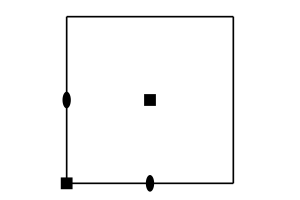

In [29]:
a = 100
b = 100j
dia = SvgwriteCellDiagram(a, b, size=("300px", "200px"))
dia.draw_cell()
dia.draw_ops(p4_gen, expand=True)
dia.draw()

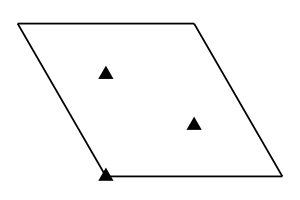

In [30]:
a = 100
b = 100 * np.exp(2j * pi / 3)
dia = SvgwriteCellDiagram(a, b, size=("300px", "200px"))
dia.draw_cell()
dia.draw_ops(p3_gen)
dia.draw()

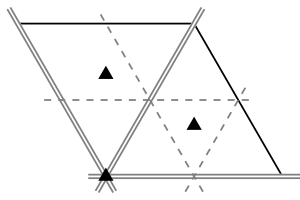

In [31]:
a = 100
b = 100 * np.exp(2j * pi / 3)
dia = SvgwriteCellDiagram(a, b, size=("300px", "200px"))
dia.draw_cell()
dia.draw_ops(p31m_gen)
dia.draw()

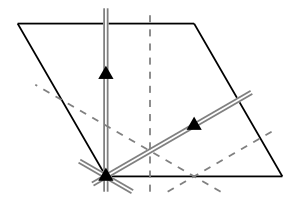

In [32]:
dia = SvgwriteCellDiagram(a, b, size=("300px", "200px"))
dia.draw_cell()
dia.draw_ops(p3m1_gen)
dia.draw()